# Projekt 1

In [1]:
#import bibliotek
from qiskit import (QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, BasicAer)
import math
import numpy
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, array_to_latex

C:\Users\szymo\AppData\Local\Temp\ipykernel_10196\469807528.py:2: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import (QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, BasicAer)


In [2]:
# funkcja zmieniająca wejście na odpowiednie stany początkowe oraz odwrócenie wyniku tak żeby był bardziej czytelny

def encode_bits(qc, a: str, b: str):
    a = a[::-1]
    b = b[::-1]
    for i in range(len(a)):
        if a[i] == '1':
            qc.x(i)
    for j in range(len(b)):
        if b[j] == '1':
            qc.x(j+4)
    return qc

C:\Users\szymo\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


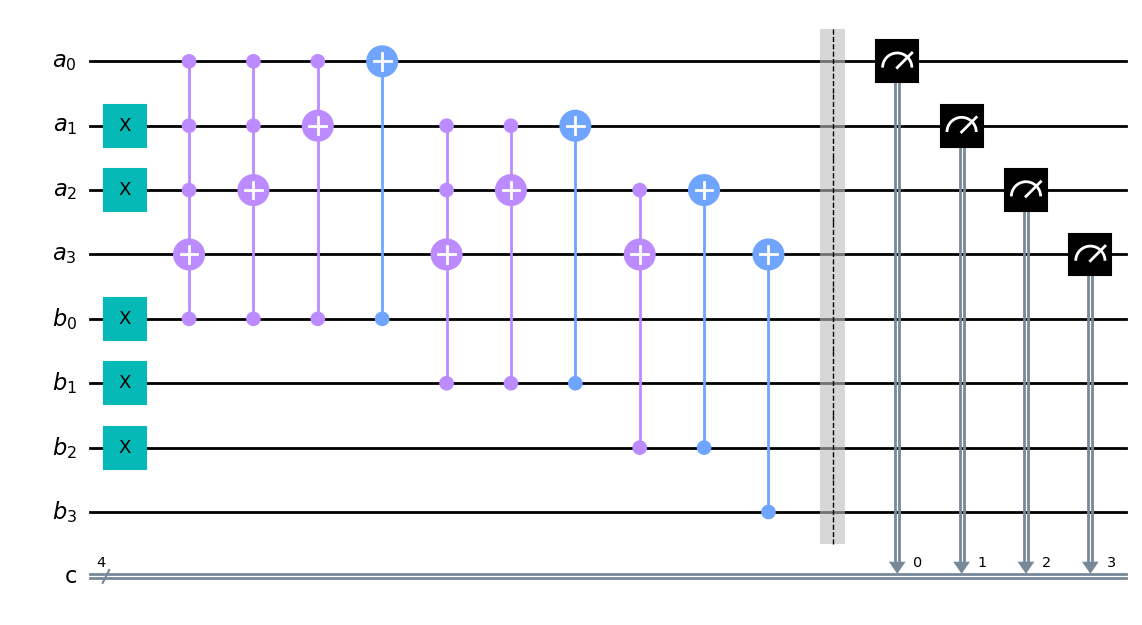

In [3]:
# kod został napisany na podstawie przykładu z pliku
# budujemy nasz obwód złożony z 8 kubitów (4 liczba a, 4 liczba b) i 4 bitów do odczytania wyniku
qa = QuantumRegister(4, 'a')
qb = QuantumRegister(4, 'b')
ca = ClassicalRegister(4, 'c')
qc = QuantumCircuit(qa, qb, ca)


# używamy wcześniej zaimplementowanej funkcji
qc = encode_bits(qc, '0110', '0111')

#dokładamy szereg bramek, które przekazują przeniesienie między bitami przy dodawaniu
# bramka mcx dodaje bity z przeniesiem
# bramka CCX tworzy przeniesienie gdy wartość będzie równa 2
# bramka cx jest stosowana do dodawania bez przeniesienia
qc.mcx([0,1,2,4], 3)
qc.mcx([0,1,4], 2)
qc.ccx(0,4,1)
qc.cx(4,0)

qc.mcx([1,2,5], 3)
qc.ccx(1,5,2)
qc.cx(5,1)

qc.ccx(2,6,3)
qc.cx(6,2)


qc.cx(7,3)


qc.barrier()
# wynik odczytywany jest z pierwszych 4 kubitów
qc.measure(range(4), range(4))
# narysowany obwód
qc.draw('mpl')


C:\Users\szymo\AppData\Local\Temp\ipykernel_10196\2507879574.py:2: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator')
C:\Users\szymo\AppData\Local\Temp\ipykernel_10196\2507879574.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(qc, backend=simulator).result()


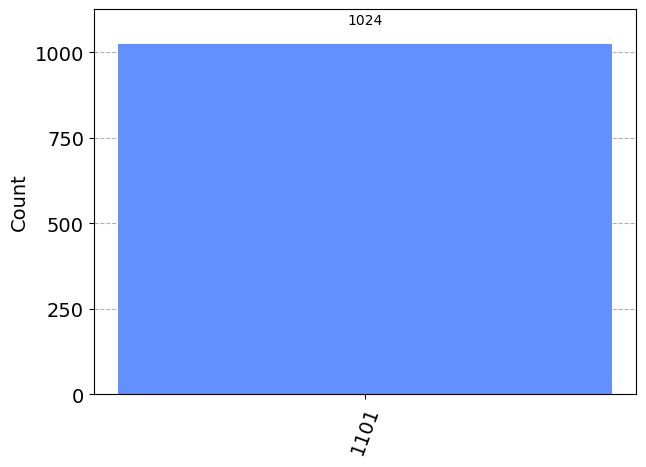

In [4]:
# wykonanie pomiaru
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))